Mit import, Importieren wir von Bibliotheken für die explorative Datenanalyse und das Plotten (Grafische Darstellung).
Und mit "as" wurden die Namen auf verkürzte schreibweise geändert.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Datensatz importieren.
df.head() gibt eine DataFrame zurück, die die ersten n Zeilen von df enthält

df = pd.read_csv("World Population.csv")
df.head()
df.info()

describe(), Die Funktion hat die Zusammenfassung der Statistik des DataFrame zurückzugeben. 
Wir haben keine Parameter übergeben, daher hat die Funktion alle Standardwerte verwendet.

In [12]:
df.describe() 

,Rank,Population
count,241.000000,2.410000e+02
mean,121.000000,3.232089e+07
std,69.714896,1.326931e+08
min,1.000000,4.000000e+01
25%,61.000000,3.012950e+05
50%,121.000000,5.227193e+06
75%,181.000000,1.967836e+07
max,241.000000,1.411779e+09


info()-Funktion. 
Die info()-Funktion wird verwendet, um eine kurze Zusammenfassung eines DataFrame zu drucken. 
Diese Methode gibt Informationen über einen DataFrame aus, 
einschließlich des Index-Dtypes und der Spalten-Dtypes, 
Nicht-Null-Werte und Speichernutzung

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        241 non-null    int64 
 1   Country     241 non-null    object
 2   Region      241 non-null    object
 3   Population  241 non-null    int64 
 4   Percentage  241 non-null    object
 5   Date        241 non-null    object
dtypes: int64(2), object(4)
memory usage: 11.4+ KB


Werte für die Suche nach Region zählen.
Die Methode value_counts() gibt eine Serie zurück, die die Anzahl eindeutiger Werte enthält.
Die Funktion sort_values() sortiert einen Datenrahmen in aufsteigender oder absteigender Reihenfolge der übergebenen Spalte. Hier ist es aufsteigend mit ascending= True
und unten aufsteigend indem man statt "True" "False" eingibt.


In [21]:
df.Region.value_counts().sort_values(ascending=True)

Europe,Asia     1
Asia,Europe     1
Oceania        27
Americas       51
Europe         52
Asia           53
Africa         56
Name: Region, dtype: int64

In [27]:
df.Region.value_counts().sort_values(ascending=False)

Africa         56
Asia           53
Europe         52
Americas       51
Oceania        27
Europe,Asia     1
Asia,Europe     1
Name: Region, dtype: int64




Grafische Darstellung der Regionalzahlen. 

figure(), soll ein figure-Objekt erstellen.

countplot() wird verwendet, um die Anzahl der Beobachtungen in jeder Kategorie mit Balken anzuzeigen.

xlabel() und ylabel(), hier geben wir die Höhe und die Breite von dem Diagramm an.  

Die add_patch(P) Methode des Axes Objekts fügt einen Patch - p zur Axis hinzu.

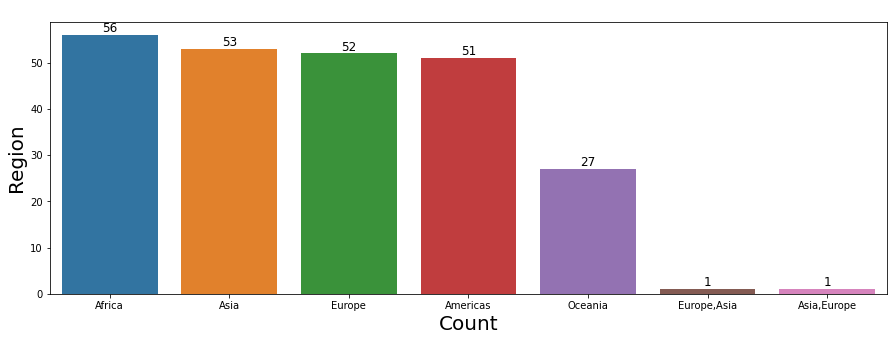

In [86]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Region", data = df, order = df["Region"].value_counts().index)
plt.xlabel("Count",fontsize=(20))
plt.ylabel("Region",fontsize=(20));

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

hier lasse ich die Länder aufsteigend nach ihrer Population ausgeben.
Die tail()-Funktion wird verwendet, um die letzten n (hier 10) Zeilen zurückzugeben. Diese Funktion gibt die letzten n Zeilen des Objekts basierend auf der Position zurück.

In [69]:
per_country = df.sort_values("Population",ascending=True)
nw_per_country=per_country.tail(10)


In [70]:
nw_per_country

,Rank,Country,Region,Population,Percentage,Date
9,10,Mexico,Americas,126014024,1.59%,20-Mar
8,9,Russia,"Europe,Asia",146171015,1.85%,21-Jan
7,8,Bangladesh,Asia,171950056,2.17%,21-Dec
6,7,Nigeria,Africa,211401000,2.67%,21-Jul
5,6,Brazil,Americas,214143381,2.70%,21-Dec
4,5,Pakistan,Asia,225200000,2.84%,21-Jul
3,4,Indonesia,Asia,271350000,3.43%,20-Dec
2,3,United States,Americas,332960297,4.20%,21-Dec
1,2,India,Asia,1386141732,17.50%,21-Dec
0,1,China,Asia,1411778724,17.80%,20-Nov


Das gleiche mache ich diesmal mit der Anforderung, dass es
die ersten 15 Ländernamen absteigend ausgibt, indem ich 
in df.sort_values() die "Population" in "Country", ascending von "True" auf "False" und in tail(10)statt 10 auf 15 ändere.

In [87]:
per_country = df.sort_values("Country",ascending=False)
nw_per_country=per_country.tail(15)

In [88]:
nw_per_country

,Rank,Country,Region,Population,Percentage,Date
90,91,Azerbaijan,Asia,10139196,0.13%,21-Jul
98,99,Austria,Europe,8976467,0.11%,21-Oct
52,53,Australia,Oceania,25922849,0.33%,21-Dec
193,194,Aruba(Netherlands),Americas,111050,0.00%,20-Dec
136,137,Armenia,Asia,2963900,0.04%,21-Mar
30,31,Argentina,Americas,45808747,0.58%,21-Jul
199,200,AntiguaandBarbuda,Americas,99337,0.00%,21-Jul
225,226,Anguilla(United Kingdom),Americas,15000,0.00%,21-Jul
44,45,Angola,Africa,32097671,0.41%,21-Jun
202,203,Andorra,Europe,78015,0.00%,20-Dec


Streudiagramm, um die einzelnen Länderprozentsätze anzuzeigen.

Die figure()-Funktion im pyplot-Modul der Matplotlib-Bibliothek wird verwendet, 
um eine neue Figur zu erstellen.

Die Methode scatterplot() wird hier verwendet, um ein Streudiagramm zu zeichnen.

Mit der Methode title() gebe ich die Überschrift des Steudiagramms an und mit fontsize() die größe des Texts.


Text(0, 0.5, 'Percentage')

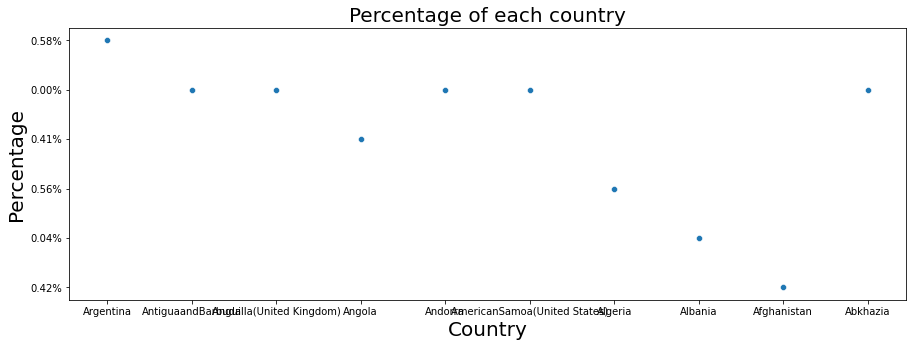

In [83]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= nw_per_country["Country"],y =nw_per_country["Percentage"])
plt.title("Percentage of each country",fontsize=(20))
plt.xlabel("Country",fontsize=(20))
plt.ylabel("Percentage",fontsize=(20))